In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
%matplotlib inline
import regex as re

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (30.0, 10.0)
plt.rcParams.update({'font.size': 15})

In [9]:
test = pd.read_csv('Data_SCientist.csv')
test

,Unnamed: 0,career_level,company,description,highlights,industry_benefits_others,job_type,location_salary_postdate,qualification,title,years_of_exp
0,0,Middle,Triangle Recruitment,Our client is a well-known HRM solution provid...,"Degree or above ,Machine Learning, Data Scienc...",IndustryInformation TechnologyBenefits & Other...,"Full Time, Permanent",Salary negotiablePosted on 10 Sep 2020,Degree,Data Scientist (Ref 016),3 years
1,1,Middle,Hong Kong Broadband Network Limited,The purpose to you with this career opportunit...,"Talent-first Culture & LIFE-work Priority,Perf...",IndustryTelecommunicationBenefits & OthersDent...,Full Time,Kwai HingSalary providedPosted on 10 Sep 2020,Degree,Machine Learning Engineer / Data Scientist,2 years
2,2,Entry Level,Grand Waye HK Limited,Fintech Data Scientist (Fresh Graduate)\nJOB H...,"Algo-Trading Core for Personal Use,C++ or rele...",IndustryEducationBenefits & OthersFive-day wor...,"Contract, Full Time, Permanent",Tsim Sha TsuiSalary negotiablePosted on 10 Sep...,Degree,Fintech Developer / Fintech Data Scientist / P...,NaN
3,3,Entry Level,DNA Recruit Partners Limited,DNA Recruit Partners is partnering up with a H...,HK Listed Conglomerate | Dynamic Regional Role...,IndustryManufacturingBenefits & OthersDental i...,"Full Time, Permanent",Salary providedPosted on 08 Sep 2020,Degree,Data Scientist (Hong Kong Listed Conglomerate ...,3 years
4,4,Middle,Leadership Solutions Limited,My clients are looking for various candidates ...,"Data engineer, Data Architect, Data migration,...",IndustryInformation TechnologyBenefits & Other...,"Contract, Full Time, Permanent",Salary negotiablePosted on 07 Sep 2020,Degree,"Data Scientist, Data Migration Engineer, Data ...",4 years
5,5,Senior,The Hong Kong Jockey Club,The Division\nThe Customer and International B...,"big data,data analysis,modeling",IndustryAthletics / SportsBenefits & OthersGra...,"Contract, Full Time",Shatin AreaPosted on 05 Sep 2020,Postgraduate,Data Scientist,5 years
6,6,Middle,Wisers Information Limited,RESPONSIBILITIES\n\n\nConduct technology resea...,"Execellent career exposure and development,Reg...",IndustryInformation TechnologyBenefits & Other...,Full Time,Wan ChaiSalary providedPosted on 04 Sep 2020,Postgraduate,AI Researcher / Data Scientist,3 years
7,7,Not Specified,Orient Overseas Container Line Ltd (OOCL),Accelerate your career\n\n\n\nExperience a tas...,"Data Scientist,Big Data,Fun-filled",IndustryFreight Forwarding / Delivery / Shippi...,"Full Time, Permanent",Shatin AreaSalary negotiablePosted on 04 Sep 2020,Not Specified,Associate Data Scientist,Not Specified
8,8,Senior,PeopleLink Services Limited,We are working with a global telecommunication...,"Data Scientist with a global telecom ,Power Bi...",IndustryInformation TechnologyBenefits & Other...,Full Time,Salary negotiablePosted on 03 Sep 2020,Degree,Data Scientist,NaN
9,9,Not Specified,Clustertech Limited,Job Description:\n\nSolve practical problems b...,"Problem solving and big data analysis,Work bot...",IndustryInformation TechnologyBenefits & Other...,"Full Time, Permanent",Shatin AreaSalary negotiablePosted on 03 Sep 2020,Degree,Data Scientist / Computational Scientist,1 year


In [677]:
df = pd.read_csv('test1_1-400.csv')

In [680]:
pd.set_option('default', None)

In [681]:
# df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

Unnamed: 0 career_level                      company  \
0           0       Senior            Neo Derm (HK) Ltd   
1           1       Middle                           EY   
2           2  Entry Level  Avery Dennison Hong Kong BV   
3           3       Senior           ConnectedGroup Ltd   
4           4       Middle                   PCCW Media   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [4]:
dup = df[df.duplicated()]
print(dup.count())

career_level                1737
company                     1721
description                 1737
highlights                  1737
industry_benefits_others    1737
job_type                    1737
location_salary_postdate    1737
qualification               1737
title                       1737
years_of_exp                1586
dtype: int64


In [5]:
df = df.drop_duplicates()

In [6]:
df["Benefits_others"] = df["industry_benefits_others"].apply(lambda x: str(x)[8:].split("Benefits & Others")[-1])
df.head()

,career_level,company,description,highlights,industry_benefits_others,job_type,location_salary_postdate,qualification,title,years_of_exp,Benefits_others
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...",IndustryHealth & Beauty CareBenefits & OthersD...,"Full Time, Permanent",Tai KooSalary providedPosted on 11 Sep 2020,Degree,Data Analytics Manager – Machine Learning / AI,5 years,"Dental insurance, Five-day work week, Free shu..."
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...",IndustryAccounting / Audit / Tax ServicesBenef...,"Full Time, Permanent",Quarry BaySalary negotiablePosted on 11 Sep 2020,Degree,Assurance – Audit Services – Financial Service...,3 years,"Life insurance, Medical insurance"
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,IndustryManufacturingBenefits & OthersDouble p...,"Full Time, Permanent",Tseung Kwan OSalary providedPosted on 11 Sep 2020,Degree,Data Solutions Specialist,3 years,"Double pay, Five-day work week, Free shuttle b..."
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...",IndustryFood and Beverage,"Full Time, Permanent",Salary providedPosted on 11 Sep 2020,Degree,"Data Analytics Manager, CRM (Food, 45K)",8 years,Food and Beverage
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,IndustryTelecommunication,Full Time,Kowloon BayPosted on 11 Sep 2020,Degree,Senior Data Analyst,6 years,Telecommunication


In [7]:
df["Industry"] = df["industry_benefits_others"].apply(lambda x: str(x)[8:].split("Benefits & Others")[0])


In [8]:
df.head()

,career_level,company,description,highlights,industry_benefits_others,job_type,location_salary_postdate,qualification,title,years_of_exp,Benefits_others,Industry
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...",IndustryHealth & Beauty CareBenefits & OthersD...,"Full Time, Permanent",Tai KooSalary providedPosted on 11 Sep 2020,Degree,Data Analytics Manager – Machine Learning / AI,5 years,"Dental insurance, Five-day work week, Free shu...",Health & Beauty Care
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...",IndustryAccounting / Audit / Tax ServicesBenef...,"Full Time, Permanent",Quarry BaySalary negotiablePosted on 11 Sep 2020,Degree,Assurance – Audit Services – Financial Service...,3 years,"Life insurance, Medical insurance",Accounting / Audit / Tax Services
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,IndustryManufacturingBenefits & OthersDouble p...,"Full Time, Permanent",Tseung Kwan OSalary providedPosted on 11 Sep 2020,Degree,Data Solutions Specialist,3 years,"Double pay, Five-day work week, Free shuttle b...",Manufacturing
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...",IndustryFood and Beverage,"Full Time, Permanent",Salary providedPosted on 11 Sep 2020,Degree,"Data Analytics Manager, CRM (Food, 45K)",8 years,Food and Beverage,Food and Beverage
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,IndustryTelecommunication,Full Time,Kowloon BayPosted on 11 Sep 2020,Degree,Senior Data Analyst,6 years,Telecommunication,Telecommunication


In [9]:
df["location_salary"] = df["location_salary_postdate"].apply(lambda x: (str(x).split("Posted on "))[0])

In [10]:
df["Posted_on"] = df["location_salary_postdate"].apply(lambda x: (str(x).split("Posted on "))[-1])

In [32]:
df["years_of_exp"] = df["years_of_exp"].str.extract(r'([\d.]+)')

In [31]:
df.head()

,career_level,company,description,highlights,job_type,location_salary_postdate,qualification,title,years_of_exp,Benefits_others,Industry,location_salary,Posted_on
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Tai KooSalary providedPosted on 11 Sep 2020,Degree,Data Analytics Manager – Machine Learning / AI,5,"Dental insurance, Five-day work week, Free shu...",Health & Beauty Care,Tai KooSalary provided,11 Sep 2020
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Quarry BaySalary negotiablePosted on 11 Sep 2020,Degree,Assurance – Audit Services – Financial Service...,3,"Life insurance, Medical insurance",Accounting / Audit / Tax Services,Quarry BaySalary negotiable,11 Sep 2020
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Tseung Kwan OSalary providedPosted on 11 Sep 2020,Degree,Data Solutions Specialist,3,"Double pay, Five-day work week, Free shuttle b...",Manufacturing,Tseung Kwan OSalary provided,11 Sep 2020
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Salary providedPosted on 11 Sep 2020,Degree,"Data Analytics Manager, CRM (Food, 45K)",8,None,Food and Beverage,Salary provided,11 Sep 2020
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Kowloon BayPosted on 11 Sep 2020,Degree,Senior Data Analyst,6,None,Telecommunication,Kowloon Bay,11 Sep 2020


In [13]:
df.drop("industry_benefits_others",axis=1,inplace=True)

In [14]:
df.head()

,career_level,company,description,highlights,job_type,location_salary_postdate,qualification,title,years_of_exp,Benefits_others,Industry,location_salary,Posted_on
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Tai KooSalary providedPosted on 11 Sep 2020,Degree,Data Analytics Manager – Machine Learning / AI,5,"Dental insurance, Five-day work week, Free shu...",Health & Beauty Care,Tai KooSalary provided,11 Sep 2020
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Quarry BaySalary negotiablePosted on 11 Sep 2020,Degree,Assurance – Audit Services – Financial Service...,3,"Life insurance, Medical insurance",Accounting / Audit / Tax Services,Quarry BaySalary negotiable,11 Sep 2020
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Tseung Kwan OSalary providedPosted on 11 Sep 2020,Degree,Data Solutions Specialist,3,"Double pay, Five-day work week, Free shuttle b...",Manufacturing,Tseung Kwan OSalary provided,11 Sep 2020
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Salary providedPosted on 11 Sep 2020,Degree,"Data Analytics Manager, CRM (Food, 45K)",8,Food and Beverage,Food and Beverage,Salary provided,11 Sep 2020
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Kowloon BayPosted on 11 Sep 2020,Degree,Senior Data Analyst,6,Telecommunication,Telecommunication,Kowloon Bay,11 Sep 2020


In [16]:
df.loc[df['Benefits_others'] == df['Industry'], 'Benefits_others'] = "None"

In [46]:
df.drop("location_salary_postdate",axis=1,inplace=True)

In [43]:
df.drop_duplicates(subset=df.columns.difference(['Posted_on']))

,career_level,company,description,highlights,job_type,location_salary_postdate,qualification,title,years_of_exp,Benefits_others,Industry,location_salary,Posted_on
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Tai KooSalary providedPosted on 11 Sep 2020,Degree,Data Analytics Manager – Machine Learning / AI,5,"Dental insurance, Five-day work week, Free shu...",Health & Beauty Care,Tai KooSalary provided,11 Sep 2020
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Quarry BaySalary negotiablePosted on 11 Sep 2020,Degree,Assurance – Audit Services – Financial Service...,3,"Life insurance, Medical insurance",Accounting / Audit / Tax Services,Quarry BaySalary negotiable,11 Sep 2020
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Tseung Kwan OSalary providedPosted on 11 Sep 2020,Degree,Data Solutions Specialist,3,"Double pay, Five-day work week, Free shuttle b...",Manufacturing,Tseung Kwan OSalary provided,11 Sep 2020
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Salary providedPosted on 11 Sep 2020,Degree,"Data Analytics Manager, CRM (Food, 45K)",8,None,Food and Beverage,Salary provided,11 Sep 2020
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Kowloon BayPosted on 11 Sep 2020,Degree,Senior Data Analyst,6,None,Telecommunication,Kowloon Bay,11 Sep 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,Middle,Hongkong Land Group Limited,Responsibilities:\n\nSupervise and carry out d...,"Engineer, 6 years of experience,Bachelor Degre...","Full Time, Permanent",CentralSalary providedPosted on 20 Aug 2020,Degree,Senior Engineer (Ref: TSS-SE-JDB),6,"Five-day work week, Medical insurance, Perform...",Property Development,CentralSalary provided,20 Aug 2020
11966,Entry Level,Lee's Cleaning Services Co. Limited,Responsibilities:\nProvide customer services s...,"Dobule Pay & Performance Bonus,Customer Servic...",Full Time,"Kowloon BayHK$14,000 - HK$20,000 /month (negot...",Degree,Secretary,2,"Double pay, Medical insurance, Performance bonus",Property Management / Consultancy,"Kowloon BayHK$14,000 - HK$20,000 /month (negot...",20 Aug 2020
11967,Not Specified,Mtel Career Consulting,Project executive\nDuty\n\nVerify data list in...,"Have education sector working experience,commu...",Contract,Salary providedPosted on 20 Aug 2020,Not Specified,Project Executive,NaN,None,Information Technology,Salary provided,20 Aug 2020
11968,Entry Level,HKT,職責\n\n處理大型電力系統的安裝、維修、保養及測試；\n電力系統包括：電掣櫃，配電系統，無...,"五年或以上相關經驗,相關學徒訓練或技工証書,持有香港駕駛執照類別（1）或（2）者優先考慮","Full Time, Permanent",Posted on 20 Aug 2020,Non-Degree Tertiary,高級技術員/技術主任 - 電器 (Ref. No.: FM-E-ST/TO-H),5,None,Telecommunication,,20 Aug 2020


In [124]:
df["location"] = df["location_salary"].apply(lambda x: (str(x).split('Salary')[0]))

In [125]:
df["location"] = (df["location"].apply(lambda x: str(x).split('HK')[0]))

In [127]:
df["location"] = df["location"].apply(lambda x: str(x).split('Base salary')[0])

In [137]:
df["test"] = df["location_salary"].apply(lambda x: str(x).split('Salary')[-1])

In [139]:
df.loc[df['test'] == df['location'], 'test'] = ""

In [143]:
df.loc[df['test'] == ' provided', 'test'] = "Salary Provided"

In [145]:
df.loc[df['test'] == ' negotiable', 'test'] = "Salary Negotiable"

In [154]:
# df.loc[df['location'] in df['test'],''] 
df["Salary"] = df.apply( lambda x: x["test"].replace( x["location"], "" )  , axis=1)

In [158]:
df.drop('test',axis=1,inplace=True)

In [159]:
df.drop('x',axis=1,inplace=True)

In [161]:
df.drop('location_salary',axis=1,inplace=True)

In [165]:
df.rename(columns={'location': 'Location'},inplace=True)

In [167]:
df.rename(columns={'years_of_exp': 'Years_Experience'},inplace=True)

In [169]:
df.rename(columns={'title': 'Title'},inplace=True)

In [171]:
df.rename(columns={'qualification': 'Qualification'},inplace=True)

In [172]:
df.rename(columns={'job_type': 'Job_Type'},inplace=True)

In [175]:
df.rename(columns={'highlights': 'Highlights'},inplace=True)

In [176]:
df.rename(columns={'description': 'Description'},inplace=True)

In [177]:
df.rename(columns={'company': 'Company'},inplace=True)

In [178]:
df.rename(columns={'career_level': 'Career_Level'},inplace=True)

In [181]:
df.head()

,Career_Level,Company,Description,Highlights,Job_Type,Qualification,Title,Years_Experience,Benefits_others,Industry,Posted_on,Location,Salary
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analytics Manager – Machine Learning / AI,5,"Dental insurance, Five-day work week, Free shu...",Health & Beauty Care,11 Sep 2020,Tai Koo,Salary Provided
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Assurance – Audit Services – Financial Service...,3,"Life insurance, Medical insurance",Accounting / Audit / Tax Services,11 Sep 2020,Quarry Bay,Salary Negotiable
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Data Solutions Specialist,3,"Double pay, Five-day work week, Free shuttle b...",Manufacturing,11 Sep 2020,Tseung Kwan O,Salary Provided
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,"Data Analytics Manager, CRM (Food, 45K)",8,None,Food and Beverage,11 Sep 2020,,Salary Provided
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Senior Data Analyst,6,None,Telecommunication,11 Sep 2020,Kowloon Bay,


In [193]:
df['Posted_On'] = pd.to_datetime(df['Posted_on'], format='%d %b %Y')

In [203]:
df['Years_Experience'] = df['Years_Experience'].astype(float)

In [334]:
df.drop(['test'],axis=1,inplace=True)

In [336]:
df["Title"].unique()

array(['Data Analytics Manager – Machine Learning / AI',
       'Assurance – Audit Services – Financial Services – Senior – iData analytics and enablement',
       'Data Solutions Specialist', ...,
       'Senior Engineer (Ref: TSS-SE-JDB)',
       '高級技術員/技術主任 - 電器 (Ref. No.: FM-E-ST/TO-H)',
       'Customer Service Clerk / Assistant (5-Day Work)'], dtype=object)

In [268]:
df["Benefits_others"].unique()

array(['Dental insurance, Five-day work week, Free shuttle bus, Medical insurance, Performance bonus',
       'Life insurance, Medical insurance',
       'Double pay, Five-day work week, Free shuttle bus, Life insurance, Medical insurance, Performance bonus',
       'None',
       'Education allowance, Flexible working hours, Medical insurance, Overtime pay, Performance bonus, Travel allowance',
       'Five-day work week, Overtime pay',
       'Dental insurance, Double pay, Five-day work week, Life insurance, Medical insurance, Performance bonus',
       'Five-day work week',
       'Dental insurance, Five-day work week, Life insurance, Medical insurance, Performance bonus',
       'Five-day work week, Flexible working hours, Overtime pay',
       'Five-day work week, Medical insurance',
       'Dental insurance, Five-day work week, Free shuttle bus, Life insurance, Medical insurance, Performance bonus',
       'Five-day work week, Gratuity, Transportation allowance',
       'Dental i

In [220]:
df['test'] = df["Highlights"].apply(lambda x: str(x).split(','))

In [300]:
df["Benefits_Dental_Insurance"] = df["Benefits_others"].map(lambda x: "Yes" if "Dental insurance" in x else ("Yes" if " Dental insurance" in x else 'No'))

In [301]:
df["Benefits_Five-day_work_week"] = df["Benefits_others"].map(lambda x: "Yes" if "Five-day work week" in x else ("Yes" if " Five-day work week" in x else 'No'))

In [303]:
df["Benefits_Free_shuttle_bus"] = df["Benefits_others"].map(lambda x: "Yes" if "Free shuttle bus" in x else ("Yes" if " Free shuttle bus" in x else 'No'))

In [305]:
df["Benefits_Life_insurance"] = df["Benefits_others"].map(lambda x: "Yes" if "Life insurance" in x else ("Yes" if " Life insurance" in x else 'No'))

In [306]:
df["Benefits_Medical_insurance"] = df["Benefits_others"].map(lambda x: "Yes" if "Medical_insurance" in x else ("Yes" if " Medical_insurance" in x else 'No'))

In [309]:
df["Benefits_Performance_bonus"] = df["Benefits_others"].map(lambda x: "Yes" if "Performance bonus" in x else ("Yes" if " Performance bonus" in x else 'No'))

In [312]:
df["Benefits_Transportation_allowance"] = df["Benefits_others"].map(lambda x: "Yes" if "Transportation allowance" in x else ("Yes" if " Transportation allowance" in x else 'No'))

In [316]:
df["Benefits_Travel_allowance"] = df["Benefits_others"].map(lambda x: "Yes" if "Travel allowance" in x else ("Yes" if " Travel allowance" in x else 'No'))

In [315]:
df["Benefits_Double_pay"] = df["Benefits_others"].map(lambda x: "Yes" if "Double pay" in x else ("Yes" if " Double pay" in x else 'No'))

In [ ]:
df["Benefits_Overtime_pay"] = df["Benefits_others"].map(lambda x: "Yes" if "Overtime pay" in x else ("Yes" if " Overtime pay" in x else 'No'))

In [318]:
df["Benefits_Education_allowance"] = df["Benefits_others"].map(lambda x: "Yes" if "Education allowance" in x else ("Yes" if " Education allowance" in x else 'No'))

In [320]:
df["Benefits_Work_from_home"] = df["Benefits_others"].map(lambda x: "Yes" if "Work from home" in x else ("Yes" if " Work from home" in x else 'No'))

In [329]:
df.drop("Benefits_others",axis=1,inplace=True)

KeyError: "['Benefits_others'] not found in axis"

In [340]:
df["Jobsdb_Indeed"] = "Jobsdb"

In [342]:
df.tail()

,Career_Level,Company,Description,Highlights,Job_Type,Qualification,Title,Years_Experience,Industry,Location,...,Benefits_Life_insurance,Benefits_Medical_insurance,Benefits_Overtime_pay,Benefits_Performance_bonus,Benefits_Transportation_allowance,Benefits_Travel_allowance,Benefits_Double_pay,Benefits_Education_allowance,Benefits_Work_from_home,Jobsdb_Indeed
11964,Middle,Hongkong Land Group Limited,Responsibilities:\n\nSupervise and carry out d...,"Engineer, 6 years of experience,Bachelor Degre...","Full Time, Permanent",Degree,Senior Engineer (Ref: TSS-SE-JDB),6.0,Property Development,Central,...,No,No,No,Yes,No,No,No,No,No,Jobsdb
11966,Entry Level,Lee's Cleaning Services Co. Limited,Responsibilities:\nProvide customer services s...,"Dobule Pay & Performance Bonus,Customer Servic...",Full Time,Degree,Secretary,2.0,Property Management / Consultancy,Kowloon Bay,...,No,No,No,Yes,No,No,Yes,No,No,Jobsdb
11967,Not Specified,Mtel Career Consulting,Project executive\nDuty\n\nVerify data list in...,"Have education sector working experience,commu...",Contract,Not Specified,Project Executive,NaN,Information Technology,,...,No,No,No,No,No,No,No,No,No,Jobsdb
11968,Entry Level,HKT,職責\n\n處理大型電力系統的安裝、維修、保養及測試；\n電力系統包括：電掣櫃，配電系統，無...,"五年或以上相關經驗,相關學徒訓練或技工証書,持有香港駕駛執照類別（1）或（2）者優先考慮","Full Time, Permanent",Non-Degree Tertiary,高級技術員/技術主任 - 電器 (Ref. No.: FM-E-ST/TO-H),5.0,Telecommunication,,...,No,No,No,No,No,No,No,No,No,Jobsdb
11969,Not Specified,The Build-Up Plastic and Metal Company Limited,Responsibilities\n\nProvide clerical support a...,"Double pay, Bonus, Bank holiday, Medical insur...","Full Time, Permanent",Not Specified,Customer Service Clerk / Assistant (5-Day Work),NaN,Manufacturing,Kwun Tong,...,No,No,No,Yes,No,No,Yes,No,No,Jobsdb


In [347]:
df.to_csv("Jobsdbclean.csv")

In [63]:
x = df.groupby('Industry').count()["company"]
x

Industry
                                                                   19
Accounting / Audit / Tax Services                                 313
Advertising / Public Relations / Marketing Services               116
Architecture / Building / Construction                            453
Athletics / Sports                                                 65
Banking                                                           573
Charity / Social Services / Non-Profit Organisation               147
Chemical / Plastic / Paper / Petrochemical                         16
Civil Services (Government, Armed Forces)                          16
Clothing / Garment / Textile                                       92
Education                                                         218
Electronics / Electrical Equipment                                109
Energy / Power / Water / Oil & Gas / Waste Management              22
Engineering - Building, Civil, Construction / Quantity Survey     331
Engineering

In [64]:
x.sort_values()

Industry
Performance / Musical / Artistic                                    3
Industrial Machinery / Automation Equipment                         7
Environmental Science                                              10
Petroleum                                                          16
Chemical / Plastic / Paper / Petrochemical                         16
Civil Services (Government, Armed Forces)                          16
Packaging                                                          18
                                                                   19
Energy / Power / Water / Oil & Gas / Waste Management              22
Motor Vehicles                                                     24
Research / Survey                                                  26
Security Escort                                                    30
Tourism / Travel Agency                                            35
Mass Transportation                                                37
Toys       

In [338]:
df.head()

,Career_Level,Company,Description,Highlights,Job_Type,Qualification,Title,Years_Experience,Industry,Location,...,Benefits_Free_shuttle_bus,Benefits_Life_insurance,Benefits_Medical_insurance,Benefits_Overtime_pay,Benefits_Performance_bonus,Benefits_Transportation_allowance,Benefits_Travel_allowance,Benefits_Double_pay,Benefits_Education_allowance,Benefits_Work_from_home
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analytics Manager – Machine Learning / AI,5.0,Health & Beauty Care,Tai Koo,...,Yes,No,No,No,Yes,No,No,No,No,No
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Assurance – Audit Services – Financial Service...,3.0,Accounting / Audit / Tax Services,Quarry Bay,...,No,Yes,No,No,No,No,No,No,No,No
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Data Solutions Specialist,3.0,Manufacturing,Tseung Kwan O,...,Yes,Yes,No,No,Yes,No,No,Yes,No,No
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,"Data Analytics Manager, CRM (Food, 45K)",8.0,Food and Beverage,,...,No,No,No,No,No,No,No,No,No,No
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Senior Data Analyst,6.0,Telecommunication,Kowloon Bay,...,No,No,No,No,No,No,No,No,No,No


In [343]:
df.rename(columns={'Highlights': 'Summary'},inplace=True)

In [344]:
df.rename(columns={'Title': 'JobTitle'},inplace=True)

In [345]:
df.head()

,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,Location,...,Benefits_Life_insurance,Benefits_Medical_insurance,Benefits_Overtime_pay,Benefits_Performance_bonus,Benefits_Transportation_allowance,Benefits_Travel_allowance,Benefits_Double_pay,Benefits_Education_allowance,Benefits_Work_from_home,Jobsdb_Indeed
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analytics Manager – Machine Learning / AI,5.0,Health & Beauty Care,Tai Koo,...,No,No,No,Yes,No,No,No,No,No,Jobsdb
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Assurance – Audit Services – Financial Service...,3.0,Accounting / Audit / Tax Services,Quarry Bay,...,Yes,No,No,No,No,No,No,No,No,Jobsdb
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Data Solutions Specialist,3.0,Manufacturing,Tseung Kwan O,...,Yes,No,No,Yes,No,No,Yes,No,No,Jobsdb
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,"Data Analytics Manager, CRM (Food, 45K)",8.0,Food and Beverage,,...,No,No,No,No,No,No,No,No,No,Jobsdb
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Senior Data Analyst,6.0,Telecommunication,Kowloon Bay,...,No,No,No,No,No,No,No,No,No,Jobsdb


In [ ]:
df.to_csv("")

In [397]:
df["Test"] = df["JobTitle"].map(lambda x: "Data Analyst" if "Data Analyst" in x else ("Data Analyst" if "Data analyst" in x else ("Data Analyst" if "Data analytics" in x else ("Data Analyst" if "Data Analytics" in x else ("Data Analyst" if "Data Analysis" in x else ("Data Scientist" if "Data Scientist" in x else ("Business Analyst" if "Business Analyst" in x else ("Data Scientist" if "Machine Learning" in x else ("Data Engineer" if "Data Engineer" in x else ("Data Scientist" if "Big Data" in x else ("Data Engineer" if "Engineer" in x else ("Data Analyst" if "Insight Analyst" in x else ("Data Entry" if "Data Entry" in x else ("Data Centre Related" if "Data Centre" in x else ("System Analyst" if "System Analyst" in x else ("Data Architect" if "Data Architect" in x else ("Data Centre Related" if "Data Center" in x else ("Data Analyst" if "Data Operation Analyst" in x else x))))))))))))))))))

In [403]:
df.tail(70)

,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,Location,...,Benefits_Medical_insurance,Benefits_Overtime_pay,Benefits_Performance_bonus,Benefits_Transportation_allowance,Benefits_Travel_allowance,Benefits_Double_pay,Benefits_Education_allowance,Benefits_Work_from_home,Jobsdb_Indeed,Test
11889,Not Specified,"JAC Recruitment Hong Kong Co., Limited","\nOur client, a leading Brand in the entertain...","Famous & Global Brand,Large negotiation to pac...",Full Time,Not Specified,Legal Officer/Paralegal,NaN,Entertainment / Recreation,Hung Hom,...,No,Yes,Yes,No,No,Yes,No,No,Jobsdb,Legal Officer/Paralegal
11890,Not Specified,Graphia International Ltd.,RESPONSIBILITIES \n\nTo handle daily accounti...,"Experience in dealing with china clients,Accou...","Full Time, Permanent",Non-Degree Tertiary,Accounting Assistant,3.0,Interior Design / Graphic Design,Tai Koo,...,No,No,Yes,No,No,No,No,No,Jobsdb,Accounting Assistant
11891,Entry Level,TUV Rheinland Hong Kong Limited,\n職位要求:\n\n中五程度 具有倉務經驗 基本電腦操作，MS Word & Excel\...,"具有倉務經驗,基本電腦操作,能立即上班者為佳","Contract, Freelance, Internship, Part Time, Te...",Non-Degree Tertiary,Intern - Warehouse Dept (3 month Contract),NaN,Laboratory,Others,...,No,Yes,No,No,No,No,No,No,Jobsdb,Intern - Warehouse Dept (3 month Contract)
11892,Middle,JPC Texson Limited,THE COMPANY :\n\n\n\nJapanese company over 60 ...,Diploma; over 5 yr shipping prf import shipmen...,"Full Time, Permanent",Non-Degree Tertiary,SHIPPING CLERK / LOGISTICS ASST – Japanese tra...,5.0,Trading and Distribution,North Point,...,No,No,Yes,No,No,Yes,No,No,Jobsdb,SHIPPING CLERK / LOGISTICS ASST – Japanese tra...
11893,Entry Level,Takara Personnel Consultancy,Marketing Manager/ HR/Secretary/ Multimedia De...,"Marketing Manager,Retailing,Designer","Full Time, Permanent",Matriculated,Marketing Manager/ HR/Secretary/ Multimedia De...,6.0,Clothing / Garment / Textile,,...,No,No,No,No,No,Yes,No,No,Jobsdb,Marketing Manager/ HR/Secretary/ Multimedia De...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,Middle,Hongkong Land Group Limited,Responsibilities:\n\nSupervise and carry out d...,"Engineer, 6 years of experience,Bachelor Degre...","Full Time, Permanent",Degree,Senior Engineer (Ref: TSS-SE-JDB),6.0,Property Development,Central,...,No,No,Yes,No,No,No,No,No,Jobsdb,Data Engineer
11966,Entry Level,Lee's Cleaning Services Co. Limited,Responsibilities:\nProvide customer services s...,"Dobule Pay & Performance Bonus,Customer Servic...",Full Time,Degree,Secretary,2.0,Property Management / Consultancy,Kowloon Bay,...,No,No,Yes,No,No,Yes,No,No,Jobsdb,Secretary
11967,Not Specified,Mtel Career Consulting,Project executive\nDuty\n\nVerify data list in...,"Have education sector working experience,commu...",Contract,Not Specified,Project Executive,NaN,Information Technology,,...,No,No,No,No,No,No,No,No,Jobsdb,Project Executive
11968,Entry Level,HKT,職責\n\n處理大型電力系統的安裝、維修、保養及測試；\n電力系統包括：電掣櫃，配電系統，無...,"五年或以上相關經驗,相關學徒訓練或技工証書,持有香港駕駛執照類別（1）或（2）者優先考慮","Full Time, Permanent",Non-Degree Tertiary,高級技術員/技術主任 - 電器 (Ref. No.: FM-E-ST/TO-H),5.0,Telecommunication,,...,No,No,No,No,No,No,No,No,Jobsdb,高級技術員/技術主任 - 電器 (Ref. No.: FM-E-ST/TO-H)


In [400]:
df["Test"].describe()

count             10904
unique             7537
top       Data Engineer
freq                995
Name: Test, dtype: object

In [587]:
df = pd.read_csv('Merge_Data.csv')

In [588]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,...,Data Mining,Hadoop,Hadoop.1,Tableau,Hive,SAS,Big Data,GCP,AI,Test
0,0,0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analytics Manager – Machine Learning / AI,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,Data Analyst
1,1,1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Assurance – Audit Services – Financial Service...,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,Data Analyst
2,2,2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Data Solutions Specialist,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
3,3,3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,"Data Analytics Manager, CRM (Food, 45K)",8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Analyst
4,4,4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Senior Data Analyst,6.0,...,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,Data Analyst


In [412]:
df.drop("Unnamed: 0",axis = 1, inplace=True)

In [422]:
df.rename(columns={'a': 'Python'},inplace=True)
df.rename(columns={'b': 'SQL'},inplace=True)
df.rename(columns={'c': 'Machine Learning'},inplace=True)
df.rename(columns={'d': 'Spark'},inplace=True)
df.rename(columns={'e': 'Java'},inplace=True)
df.rename(columns={'f': 'Data Mining'},inplace=True)
df.rename(columns={'g': 'Hadoop'},inplace=True)
df.rename(columns={'h': 'Tableau'},inplace=True)
df.rename(columns={'i': 'Hive'},inplace=True)
df.rename(columns={'j': 'SAS'},inplace=True)
df.rename(columns={'k': 'Big Data'},inplace=True)
df.rename(columns={'l': 'GCP'},inplace=True)
df.rename(columns={'m': 'AI'},inplace=True)

df.head()

,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,Location,...,Data Mining,Hadoop,Hadoop,Tableau,Hive,SAS,Big Data,GCP,AI,Test
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analytics Manager – Machine Learning / AI,5.0,Health & Beauty Care,Tai Koo,...,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,Data Analyst
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Assurance – Audit Services – Financial Service...,3.0,Accounting / Audit / Tax Services,Quarry Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,Data Analyst
2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Data Solutions Specialist,3.0,Manufacturing,Tseung Kwan O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Solutions Specialist
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,"Data Analytics Manager, CRM (Food, 45K)",8.0,Food and Beverage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Analyst
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Senior Data Analyst,6.0,Telecommunication,Kowloon Bay,...,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,Data Analyst


In [544]:
df.rename(columns={'Hadoop.1': 'Data Mining'},inplace=True)

In [609]:
# df["JobTitle"] = 
df["JobTitle"] = df["JobTitle"].map(lambda x: "Data Analyst" if "Data Analyst" in x else ("Data Analyst" if "Data analyst" in x else ("Data Analyst" if "Data analytics" in x else ("Data Analyst" if "Data Analytics" in x else ("Data Analyst" if "Data Analysis" in x else ("Data Scientist" if "Data Scientist" in x else ("Business Analyst" if "Business Analyst" in x else ("Data Scientist" if "Machine Learning" in x else ("Data Engineer" if "Data Engineer" in x else ("Data Scientist" if "Big Data" in x else ("Data Engineer" if "Data Engineer" in x else ("Data Analyst" if "Insight Analyst" in x else ("Data Entry" if "Data Entry" in x else ("Data Centre Related" if "Data Centre" in x else ("System Analyst" if "System Analyst" in x else ("Data Architect" if "Architect" in x else ("Data Centre Related" if "Data Center" in x else ("Data Analyst" if "Data Operation Analyst" in x else ("Quant Analyst" if "Quant" in x else ("Programmers" if "Programmers" in x else ("IT Analyst" if "IT Analyst" in x else ("Data Analyst" if "DATA ANALYST" in x else ("Programmers" if "Programmer" in x else ("Data Risk Related" if "Risk" in x else ("Data Centre Related" if "DATA CENTRE" in x else ("Data Management" if "Data Management" in x else ("Data Management" if "Data Manager" in x else ("Business Intelligence" if "Business Intelligence" in x else ("Software Engineer" if "Software Engineer" in x else ("Business Intelligence" if "BI" in x else ("Business Analyst" if "BUSINESS ANALYST" in x else 'Others')))))))))))))))))))))))))))))))


In [666]:
print(df["JobTitle"].value_counts().head(5))

Programmers          252
Data Risk Related    171
Business Analyst     169
Data Analyst         143
Data Scientist       138
Name: JobTitle, dtype: int64


In [595]:
df.head(60)

,Unnamed: 0,Unnamed: 0.1,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,...,Data Mining,Hadoop,Hadoop.1,Tableau,Hive,SAS,Big Data,GCP,AI,Test
0,0,0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analytics Manager – Machine Learning / AI,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,Data Analyst
1,1,1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Assurance – Audit Services – Financial Service...,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,Data Analyst
2,2,2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Data Solutions Specialist,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Solutions Specialist
3,3,3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,"Data Analytics Manager, CRM (Food, 45K)",8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Analyst
4,4,4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Senior Data Analyst,6.0,...,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,Data Analyst
5,5,5,Entry Level,Gold Profit Group Holdings Limited,主要職責：\n\n處理電腦數據輸入\n日常文檔處理及更新\n確保數據錄入準確及時\n\n職...,"數據輸入快速，中文輸入能力強, 工作態度認真,高效，電腦操作能力強, 熟練運用WORD，EX...",Full Time,School Certificate,資料輸入員/ Data Entry Clerk,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Entry
6,6,6,Middle,BDO Financial Services Limited,Our client\nis a multinational bank with an al...,"Temp to Perm role,Banking Experience a Must,Vi...","Contract, Full Time, Permanent",Degree,Data Analyst – Banking (1 year renewable cont...,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Analyst
7,7,7,Not Specified,Principal Trust Company (Asia) Limited,Responsibilities:\nData/Analytics COE \n\nYou ...,"Data Analyst, Data Scientist, Customer Analyti...","Full Time, Permanent",Not Specified,Data Analyst,NaN,...,NaN,NaN,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,Data Analyst
8,8,8,Middle,IT Solutions Ltd.,\nWe are searching for a high calibre Data Cen...,"Data Centre Relocation Experience,Project Mana...","Contract, Full Time",Degree,Data Centre Associate / Specialist - Data Cent...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Centre Related
9,9,9,Middle,Acton Consulting Limited,A leading MNC is looking for talent Engineers/...,"Data Center Daily Routine task,Simple Knowledg...","Contract, Full Time, Permanent",Non-Degree Tertiary,(Senior) Operators - Data Centre,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Centre Related


In [633]:
df = df[df["JobTitle"] != 'Other']
# df.drop('Unnamed: 0',axis=1,inplace=True)

In [615]:
df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [617]:
df.drop('Test',axis=1,inplace=True)

In [634]:
df.head()

,level_0,index,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,...,Data Mining,Hadoop,Hadoop.1,Tableau,Hive,SAS,Big Data,GCP,AI,R
0,0,0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analyst,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,NaN
1,1,1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Data Analyst,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,R
2,2,2,Entry Level,Avery Dennison Hong Kong BV,\nAbout Your Role\nThe Data Solutions Speciali...,Strong interest in IT solutions & data managem...,"Full Time, Permanent",Degree,Others,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R\n
3,3,3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,Data Analyst,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Data Analyst,6.0,...,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,R;


In [638]:
df.drop("level_0",axis=1,inplace=True)

In [639]:
df.drop("index",axis=1,inplace=True)

In [646]:
df = df[df["JobTitle"] != 'Others']

,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,Location,...,Data Mining,Hadoop,Hadoop.1,Tableau,Hive,SAS,Big Data,GCP,AI,R
0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analyst,5.0,Health & Beauty Care,Tai Koo,...,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,NaN
1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Data Analyst,3.0,Accounting / Audit / Tax Services,Quarry Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,R
3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,Data Analyst,8.0,Food and Beverage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Data Analyst,6.0,Telecommunication,Kowloon Bay,...,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,R;
5,Entry Level,Gold Profit Group Holdings Limited,主要職責：\n\n處理電腦數據輸入\n日常文檔處理及更新\n確保數據錄入準確及時\n\n職...,"數據輸入快速，中文輸入能力強, 工作態度認真,高效，電腦操作能力強, 熟練運用WORD，EX...",Full Time,School Certificate,Data Entry,1.0,Financial Services,Tsim Sha Tsui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R


In [622]:
df['R'] = df.Description.str.extract(r'(R[^\w&])')

In [531]:
df.drop("Test",axis=1,inplace=True)

In [545]:
df['Python'].replace(np.nan,'')
df['SQL'].replace(np.nan,'')
df['Machine Learning'].replace(np.nan,'')
df['Spark'].replace(np.nan,'')
df['Java'].replace(np.nan,'')
df['Data Mining'].replace(np.nan,'')
df['Hadoop'].replace(np.nan,'')
df['Tableau'].replace(np.nan,'')
df['Hive'].replace(np.nan,'')
df['SAS'].replace(np.nan,'')
df['Big Data'].replace(np.nan,'')
df['GCP'].replace(np.nan,'')
df['AI'].replace(np.nan,'')
df['R'].replace(np.nan,'')

KeyError: 'Java'

In [551]:
df["Data Mining"]

,Data Mining,Data Mining
0,NaN,NaN
1,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
11936,NaN,NaN
11938,NaN,NaN
11939,NaN,NaN
11940,NaN,NaN


In [659]:
df.rename(columns={'Hadoop.1': 'Hadoop'},inplace=True)

In [468]:
df["Test"].describe()

count             11953
unique             7408
top       Data Engineer
freq               1425
Name: Test, dtype: object

In [658]:
df["Hadoop.1"].unique()

array([nan, 'Hadoop'], dtype=object)

In [660]:
df.head()

,index,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,...,Java,Data Mining,Hadoop,Tableau,Hive,SAS,Big Data,GCP,AI,R
0,0,Senior,Neo Derm (HK) Ltd,About us:\nNeo Derm has been continuously unde...,"Develop different data science initiatives ,Ma...","Full Time, Permanent",Degree,Data Analyst,5.0,Health & Beauty Care,...,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,NaN
1,1,Middle,EY,FSO Assurance Senior – iData analytics and ena...,"University degree or above,Knowledge of MS Exc...","Full Time, Permanent",Degree,Data Analyst,3.0,Accounting / Audit / Tax Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,R
2,3,Senior,ConnectedGroup Ltd,Our client is a leading F&B label. They are no...,"build customer life-cycle programs,traffic gen...","Full Time, Permanent",Degree,Data Analyst,8.0,Food and Beverage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Middle,PCCW Media,Key Responsibilities\n\nLead and set the roadm...,Lead and set the roadmap of data-driven cultur...,Full Time,Degree,Data Analyst,6.0,Telecommunication,...,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,R;
4,5,Entry Level,Gold Profit Group Holdings Limited,主要職責：\n\n處理電腦數據輸入\n日常文檔處理及更新\n確保數據錄入準確及時\n\n職...,"數據輸入快速，中文輸入能力強, 工作態度認真,高效，電腦操作能力強, 熟練運用WORD，EX...",Full Time,School Certificate,Data Entry,1.0,Financial Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R


In [661]:
df.to_csv('Merge_Data.csv')

In [461]:
df["Industry"].unique()

array(['Health & Beauty Care', 'Accounting / Audit / Tax Services',
       'Manufacturing', 'Food and Beverage', 'Telecommunication',
       'Financial Services', 'Banking', 'Insurance / Pension Funding',
       'Civil Services (Government, Armed Forces)',
       'Information Technology', 'Property Management / Consultancy',
       'Clothing / Garment / Textile',
       'Human Resources Management / Consultancy', 'Engineering - Others',
       'Property Development',
       'Engineering - Building, Civil, Construction / Quantity Survey',
       'Athletics / Sports', 'Freight Forwarding / Delivery / Shipping',
       'Education', 'Medical / Pharmaceutical', 'Hospitality / Catering',
       'Architecture / Building / Construction',
       'Media / Publishing / Printing', 'Wholesale / Retail', 'Petroleum',
       'Advertising / Public Relations / Marketing Services',
       'Management Consultancy / Service', 'General Business Services',
       'Charity / Social Services / Non-Profit Orga

In [662]:
df.to_csv("GroupProject.csv")

In [652]:
df["Data Mining"].unique()

array([nan, 'Java'], dtype=object)

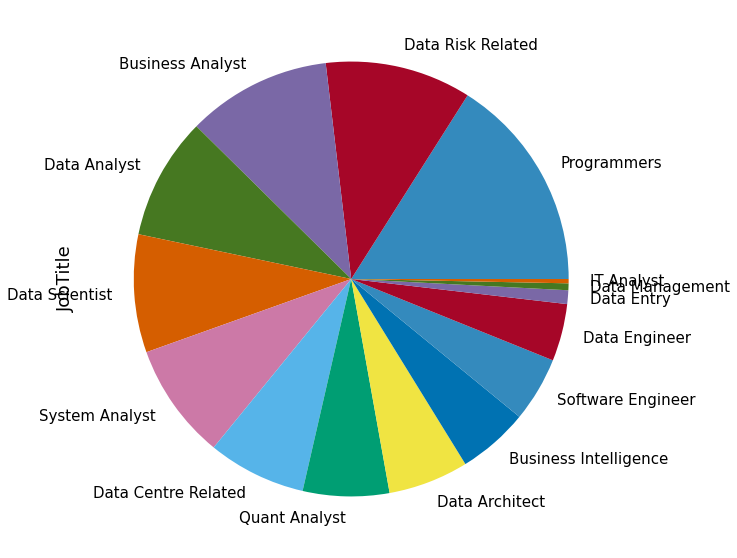

In [663]:
df['JobTitle'].value_counts().plot.pie()

In [556]:
df1 = df.loc[:, ['Python','Machine Learning','Spark','Java','Data Mining','Hadoop','Tableau','Hive','SAS','Big Data','GCP','AI','R']]

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
df1['Skill']= df1.values.tolist()


In [648]:
df.reset_index(inplace=True)

In [649]:
df.shape

(1574, 40)

In [562]:
df['Skill'] = df[df.columns[26:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

,index,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,...,Data Mining,Hadoop,Data Mining,Tableau,Hive,SAS,Big Data,GCP,AI,R
2642,11936,NaN,ZhongAn Technologies International Group Limited,About ZA International\nZhongAn Technologies I...,Perform data analysis and prepare intelligence...,NaN,NaN,Data Risk Related,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,11938,NaN,Premier Technology Global Limited,Key Responsibilities:\nImplementation and supp...,Candidates with more experience will be consid...,NaN,NaN,Data Engineer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2644,11939,NaN,Bank of Singapore,"Reporting to Strategy Management, who reports ...",Conduct data mining and business analysis in S...,NaN,NaN,Business Analyst,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2645,11940,NaN,Recruitment Intelligence Consultants Limited,Well known international Asset Management Firm...,"Identify data issues, perform root cause analy...",NaN,NaN,Data Analyst,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2646,11947,NaN,Bo Le Leaders Ltd,"1. Excellent analytical skills, programming ex...","Work closely with PM on data analysis, data mi...",NaN,NaN,Quant Analyst,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [569]:
df[df.columns[26:]]

,Python,SQL,Machine Learning,Spark,Data Mining,Data Mining,Hadoop,Data Mining,Data Mining,Tableau,Hive,SAS,Big Data,GCP,AI,R
0,NaN,NaN,Machine Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Big Data,NaN,AI,NaN
1,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,R
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,SQL,NaN,Spark,NaN,NaN,NaN,NaN,NaN,NaN,Hive,NaN,NaN,NaN,AI,R;
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2645,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [626]:
df.tail(

,index,Career_Level,Company,Description,Summary,Job_Type,Qualification,JobTitle,Years_Experience,Industry,...,Data Mining,Hadoop,Hadoop.1,Tableau,Hive,SAS,Big Data,GCP,AI,R
11948,11948,NaN,First Abu Dhabi Bank,KEY RESPONSIBILITIES:\nResponsible for working...,Consistent analysis of economic data and marke...,NaN,NaN,Others,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11949,11949,NaN,Aozora Asia Pacific Finance Limited,".Responsibilities:\nWorking as a team member, ...",Supervise junior analysts for production of qu...,NaN,NaN,Others,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11950,11950,NaN,Global Sage Hong Kong,Responsibilities:\nCorporate Business Developm...,Conduct overall Corporate portfolio analysis;\...,NaN,NaN,Others,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
11951,11951,NaN,China Shandong Hi-Speeed Financial Group Ltd,Key Responsibilities:\nProfessionally advise o...,Focus on investment opportunity/project analys...,NaN,NaN,Others,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11952,11952,NaN,Zeal Holding Limited,Responsibilities but not limited to\nManage th...,(Personal Data collected will be used for recr...,NaN,NaN,Others,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
